In [1]:

from matplotlib import pyplot as plt
import numpy as np
import scipy.io

from PIL import Image 
import predo
from keras import models
import time

In [2]:
# predict
def one_hot_decode(data):
    data = np.squeeze(data)
    list_max=data.tolist()
    list_max.sort(key=lambda x: float(x), reverse = True)
    n = np.argwhere(data==list_max[0])
    return int(n), list_max[0]

def translate_Y(yi , show = False):
    
    num = {
        0 : "2", 1 : "3", 2 : "4", 3 : "5", 4 : "7", 
        5 : "9", 6 : "A", 7 : "C", 8 : "F", 9 : "H", 
        10: "K", 11: "M", 12: "N", 13: "P", 14: "Q",
        15: "R", 16: "T", 17: "Y", 18: "Z"  } 
    
    yi_new = num.get( yi ) 
            
    if show:
        print(yi)
        print(yi_new)            
        
    return yi_new

In [4]:
#setup model
model_name = 'nopre_test_2024_03_17.h5'
test = models.load_model(model_name)
print(test.summary()) 


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd2 in position 29: invalid continuation byte

In [5]:
#load test data
data = scipy.io.loadmat('database/test.mat') 
print("data.keys()",data.keys())
 
origin_X = np.array(data['x'].flat)
origin_Y = data['y'][0].reshape(3000,-1)
origin_Y_onehot= data['y_onehot'].reshape(3000,4,19)
    
print ("origin_X shape: "+str(origin_X.shape))
print ("origin_Y shape: "+str(origin_Y.shape))
print ("origin_Y_onehot shape: "+str(origin_Y_onehot.shape))

data.keys() dict_keys(['__header__', '__version__', '__globals__', 'y_onehot', 'x', 'y'])
origin_X shape: (3000,)
origin_Y shape: (3000, 4)
origin_Y_onehot shape: (3000, 4, 19)


input_x shape: (3000,)
origin_Y_onehot shape: (3000, 4, 19)
origin_Y : [17  2 11  2]
origin_Y_onehot : 
~ 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 ~
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


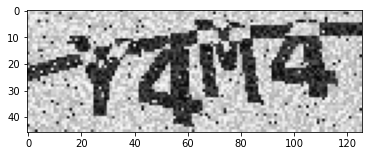

In [6]:
#check input_x data
showdata_seed=12

print ("input_x shape: "+str(origin_X.shape))
print ("origin_Y_onehot shape: "+str(origin_Y_onehot.shape))


'''    '''
position="~ 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 ~\n"
plt.imshow(origin_X[showdata_seed])
print ("origin_Y : "+str(origin_Y[showdata_seed]))
print ("origin_Y_onehot : \n"+position+str(origin_Y_onehot[showdata_seed]))



-------------------------------------------
---------------- index 0 ----------------
predict= [('7', 'P', 'P', '4')]
answer= [('7', 'F', '9', '4')] ,wrong words= 2


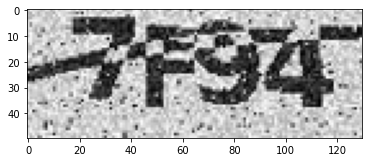

predict= [('7', 'P', 'P', '4')]
answer= [('7', 'F', '9', '4')] ,wrong words= 2


-------------------------------------------
---------------- index 1 ----------------
predict= [('F', 'T', 'T', 'F')]
answer= [('4', '2', 'T', '7')] ,wrong words= 3


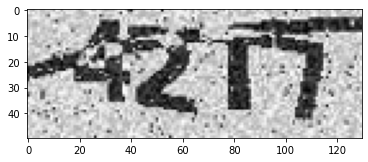

predict= [('F', 'T', 'T', 'F')]
answer= [('4', '2', 'T', '7')] ,wrong words= 3


-------------------------------------------
---------------- index 2 ----------------
predict= [('T', 'P', '7', 'P')]
answer= [('C', 'Y', 'T', 'F')] ,wrong words= 4


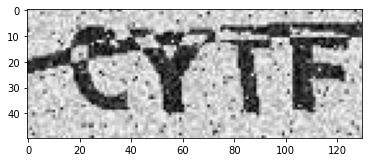

predict= [('T', 'P', '7', 'P')]
answer= [('C', 'Y', 'T', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 3 ----------------
predict= [('Y', 'F', 'P', 'Y')]
answer= [('T', 'M', 'F', 'T')] ,wrong words= 4


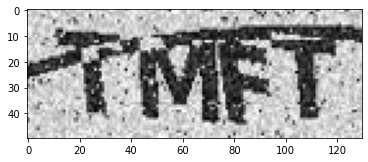

predict= [('Y', 'F', 'P', 'Y')]
answer= [('T', 'M', 'F', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 4 ----------------
predict= [('P', '7', 'T', 'P')]
answer= [('P', '7', 'K', 'R')] ,wrong words= 2


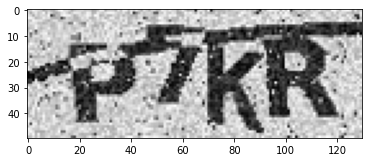

predict= [('P', '7', 'T', 'P')]
answer= [('P', '7', 'K', 'R')] ,wrong words= 2


-------------------------------------------
---------------- index 5 ----------------
predict= [('R', 'T', 'T', '3')]
answer= [('N', '2', 'Z', 'K')] ,wrong words= 4


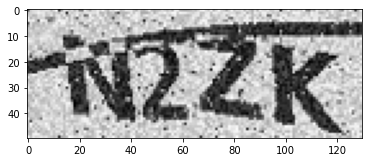

predict= [('R', 'T', 'T', '3')]
answer= [('N', '2', 'Z', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 6 ----------------
predict= [('7', 'F', 'P', 'Y')]
answer= [('7', '4', 'F', 'Y')] ,wrong words= 2


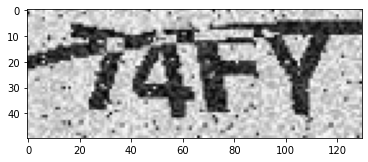

predict= [('7', 'F', 'P', 'Y')]
answer= [('7', '4', 'F', 'Y')] ,wrong words= 2


-------------------------------------------
---------------- index 7 ----------------
predict= [('C', 'T', '5', 'C')]
answer= [('Z', 'Z', '5', 'C')] ,wrong words= 2


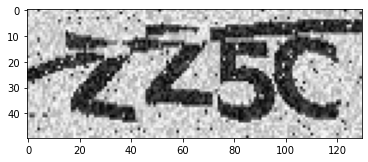

predict= [('C', 'T', '5', 'C')]
answer= [('Z', 'Z', '5', 'C')] ,wrong words= 2


-------------------------------------------
---------------- index 8 ----------------
predict= [('7', 'T', 'P', 'P')]
answer= [('7', 'Z', '4', '4')] ,wrong words= 3


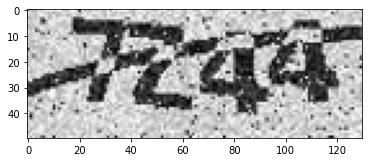

predict= [('7', 'T', 'P', 'P')]
answer= [('7', 'Z', '4', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 9 ----------------
predict= [('F', 'F', '7', 'C')]
answer= [('R', '4', 'Z', 'C')] ,wrong words= 3


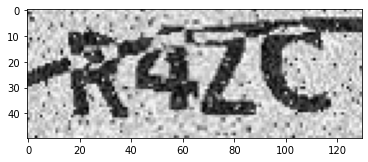

predict= [('F', 'F', '7', 'C')]
answer= [('R', '4', 'Z', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 10 ----------------
predict= [('Y', '7', 'P', '7')]
answer= [('Y', '2', '5', 'T')] ,wrong words= 3


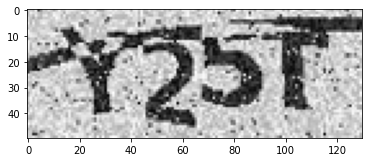

predict= [('Y', '7', 'P', '7')]
answer= [('Y', '2', '5', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 11 ----------------
predict= [('F', 'P', 'T', '3')]
answer= [('F', 'M', '2', '2')] ,wrong words= 3


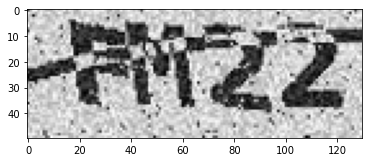

predict= [('F', 'P', 'T', '3')]
answer= [('F', 'M', '2', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 12 ----------------
predict= [('Y', 'F', 'P', 'P')]
answer= [('Y', '4', 'M', '4')] ,wrong words= 3


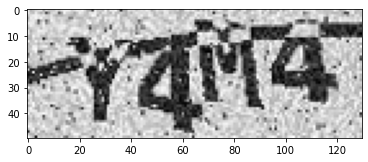

predict= [('Y', 'F', 'P', 'P')]
answer= [('Y', '4', 'M', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 13 ----------------
predict= [('F', '7', 'T', '7')]
answer= [('M', '2', 'Q', '2')] ,wrong words= 4


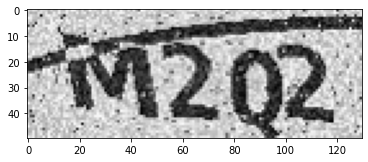

predict= [('F', '7', 'T', '7')]
answer= [('M', '2', 'Q', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 14 ----------------
predict= [('F', 'P', '7', '4')]
answer= [('F', 'F', '7', 'N')] ,wrong words= 2


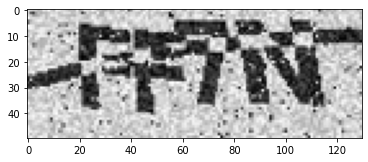

predict= [('F', 'P', '7', '4')]
answer= [('F', 'F', '7', 'N')] ,wrong words= 2


-------------------------------------------
---------------- index 15 ----------------
predict= [('2', '5', 'P', 'F')]
answer= [('9', '5', 'R', 'M')] ,wrong words= 3


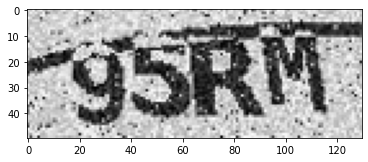

predict= [('2', '5', 'P', 'F')]
answer= [('9', '5', 'R', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 16 ----------------
predict= [('P', 'F', 'T', '3')]
answer= [('T', '4', 'T', '5')] ,wrong words= 3


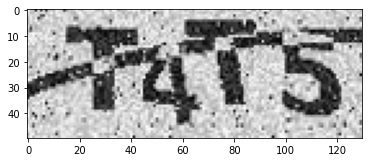

predict= [('P', 'F', 'T', '3')]
answer= [('T', '4', 'T', '5')] ,wrong words= 3


-------------------------------------------
---------------- index 17 ----------------
predict= [('F', 'P', '4', 'Q')]
answer= [('F', '3', '4', '3')] ,wrong words= 2


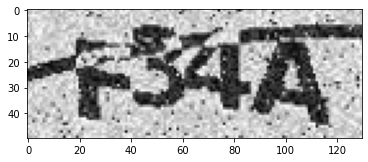

predict= [('F', 'P', '4', 'Q')]
answer= [('F', '3', '4', '3')] ,wrong words= 2


-------------------------------------------
---------------- index 18 ----------------
predict= [('F', 'F', '4', 'P')]
answer= [('F', 'A', '4', 'A')] ,wrong words= 2


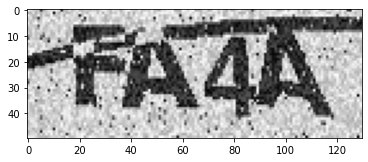

predict= [('F', 'F', '4', 'P')]
answer= [('F', 'A', '4', 'A')] ,wrong words= 2


-------------------------------------------
---------------- index 19 ----------------
predict= [('5', 'T', '4', 'P')]
answer= [('3', '2', 'H', '4')] ,wrong words= 4


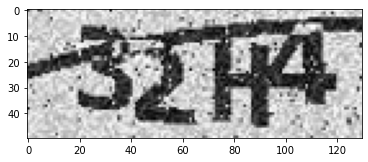

predict= [('5', 'T', '4', 'P')]
answer= [('3', '2', 'H', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 20 ----------------
predict= [('2', 'P', '4', 'P')]
answer= [('Q', 'H', 'M', 'A')] ,wrong words= 4


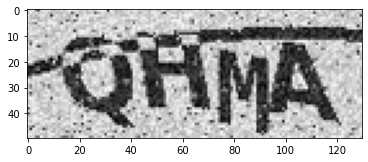

predict= [('2', 'P', '4', 'P')]
answer= [('Q', 'H', 'M', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 21 ----------------
predict= [('F', 'Y', 'T', 'P')]
answer= [('P', 'Y', 'C', 'P')] ,wrong words= 2


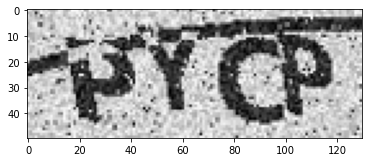

predict= [('F', 'Y', 'T', 'P')]
answer= [('P', 'Y', 'C', 'P')] ,wrong words= 2


-------------------------------------------
---------------- index 22 ----------------
predict= [('F', 'P', 'M', 'P')]
answer= [('A', 'P', 'N', 'M')] ,wrong words= 3


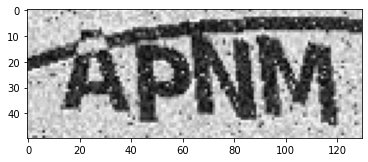

predict= [('F', 'P', 'M', 'P')]
answer= [('A', 'P', 'N', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 23 ----------------
predict= [('F', 'F', '4', 'P')]
answer= [('R', 'M', 'Q', 'N')] ,wrong words= 4


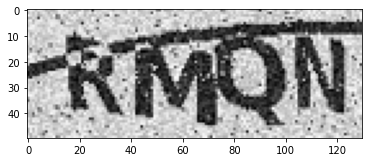

predict= [('F', 'F', '4', 'P')]
answer= [('R', 'M', 'Q', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 24 ----------------
predict= [('K', 'Z', '7', 'P')]
answer= [('K', 'Z', '7', '4')] ,wrong words= 1


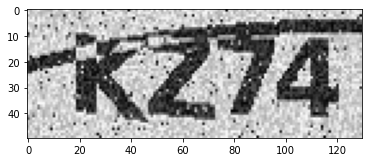

predict= [('K', 'Z', '7', 'P')]
answer= [('K', 'Z', '7', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 25 ----------------
predict= [('4', 'F', '7', 'F')]
answer= [('N', 'F', 'Z', 'H')] ,wrong words= 3


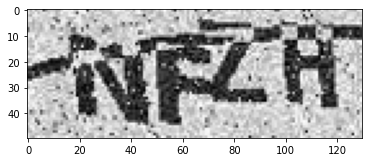

predict= [('4', 'F', '7', 'F')]
answer= [('N', 'F', 'Z', 'H')] ,wrong words= 3


-------------------------------------------
---------------- index 26 ----------------
predict= [('Y', 'Z', '7', '4')]
answer= [('Y', '2', '7', 'R')] ,wrong words= 2


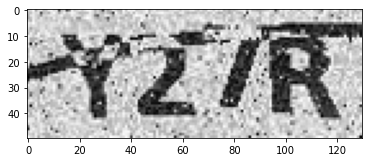

predict= [('Y', 'Z', '7', '4')]
answer= [('Y', '2', '7', 'R')] ,wrong words= 2


-------------------------------------------
---------------- index 27 ----------------
predict= [('F', 'P', '9', 'Q')]
answer= [('A', 'Y', 'R', '4')] ,wrong words= 4


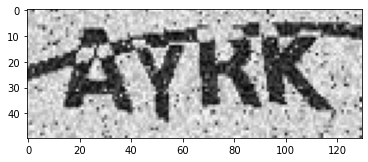

predict= [('F', 'P', '9', 'Q')]
answer= [('A', 'Y', 'R', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 28 ----------------
predict= [('P', 'F', 'M', 'Y')]
answer= [('M', '9', '4', 'Y')] ,wrong words= 3


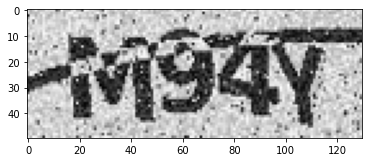

predict= [('P', 'F', 'M', 'Y')]
answer= [('M', '9', '4', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 29 ----------------
predict= [('5', 'F', 'P', '7')]
answer= [('3', '5', 'Q', '7')] ,wrong words= 3


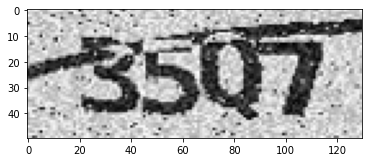

predict= [('5', 'F', 'P', '7')]
answer= [('3', '5', 'Q', '7')] ,wrong words= 3


-------------------------------------------
---------------- index 30 ----------------
predict= [('R', '7', '7', '4')]
answer= [('A', 'Y', 'H', 'A')] ,wrong words= 4


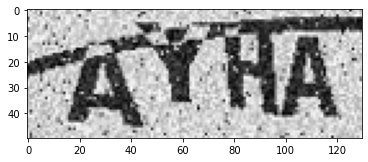

predict= [('R', '7', '7', '4')]
answer= [('A', 'Y', 'H', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 31 ----------------
predict= [('Y', 'F', 'P', '3')]
answer= [('T', 'R', '4', '5')] ,wrong words= 4


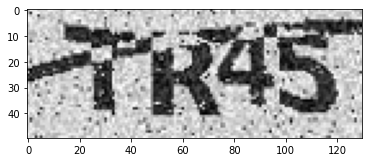

predict= [('Y', 'F', 'P', '3')]
answer= [('T', 'R', '4', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 32 ----------------
predict= [('C', '7', '4', '3')]
answer= [('Q', 'T', 'R', '4')] ,wrong words= 4


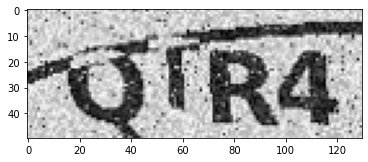

predict= [('C', '7', '4', '3')]
answer= [('Q', 'T', 'R', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 33 ----------------
predict= [('Y', 'Y', '4', 'P')]
answer= [('2', '7', '3', 'A')] ,wrong words= 4


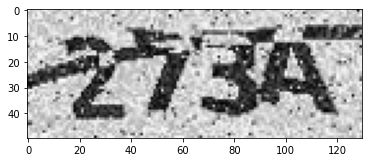

predict= [('Y', 'Y', '4', 'P')]
answer= [('2', '7', '3', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 34 ----------------
predict= [('5', 'F', 'P', 'F')]
answer= [('Q', 'M', 'Y', 'F')] ,wrong words= 3


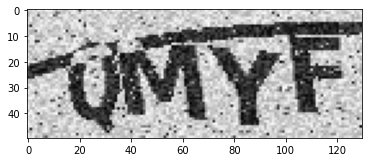

predict= [('5', 'F', 'P', 'F')]
answer= [('Q', 'M', 'Y', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 35 ----------------
predict= [('7', 'P', '4', 'K')]
answer= [('2', 'Y', 'N', 'K')] ,wrong words= 3


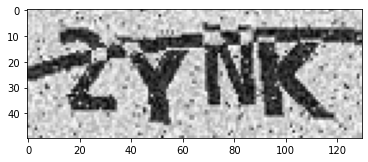

predict= [('7', 'P', '4', 'K')]
answer= [('2', 'Y', 'N', 'K')] ,wrong words= 3


-------------------------------------------
---------------- index 36 ----------------
predict= [('F', 'F', 'T', '7')]
answer= [('R', 'H', 'T', 'P')] ,wrong words= 3


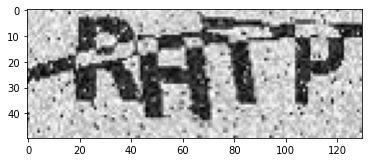

predict= [('F', 'F', 'T', '7')]
answer= [('R', 'H', 'T', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 37 ----------------
predict= [('7', 'T', 'T', '4')]
answer= [('7', 'K', 'Q', '5')] ,wrong words= 3


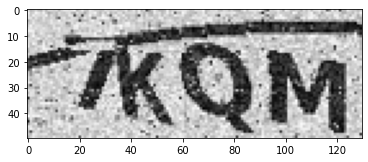

predict= [('7', 'T', 'T', '4')]
answer= [('7', 'K', 'Q', '5')] ,wrong words= 3


-------------------------------------------
---------------- index 38 ----------------
predict= [('7', 'F', 'P', 'Y')]
answer= [('7', 'H', 'Y', 'P')] ,wrong words= 3


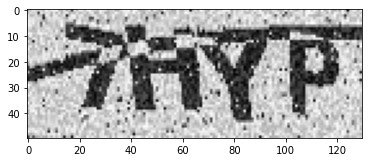

predict= [('7', 'F', 'P', 'Y')]
answer= [('7', 'H', 'Y', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 39 ----------------
predict= [('5', 'F', '7', 'Y')]
answer= [('5', 'M', '3', 'K')] ,wrong words= 3


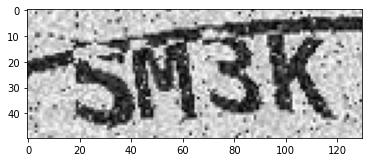

predict= [('5', 'F', '7', 'Y')]
answer= [('5', 'M', '3', 'K')] ,wrong words= 3


-------------------------------------------
---------------- index 40 ----------------
predict= [('F', 'T', 'P', '3')]
answer= [('H', 'C', 'Y', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 41 ----------------
predict= [('F', 'P', '4', 'F')]
answer= [('N', 'F', 'A', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 42 ----------------
predict= [('7', 'P', '9', 'C')]
answer= [('7', '4', '5', 'K')] ,wrong words= 3


-------------------------------------------
---------------- index 43 ----------------
predict= [('P', 'F', 'T', '3')]
answer= [('M', 'M', 'C', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 44 ----------------
predict= [('F', '7', '7', '4')]
answer= [('N', '3', 'T', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 45 ---------

predict= [('5', 'F', 'Y', '3')]
answer= [('4', 'K', 'Y', '9')] ,wrong words= 3


-------------------------------------------
---------------- index 89 ----------------
predict= [('Y', 'P', 'P', 'P')]
answer= [('7', '5', 'M', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 90 ----------------
predict= [('5', 'F', 'P', 'P')]
answer= [('3', 'Q', 'P', 'N')] ,wrong words= 3


-------------------------------------------
---------------- index 91 ----------------
predict= [('4', 'F', 'Z', '7')]
answer= [('9', 'M', 'C', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 92 ----------------
predict= [('T', 'P', 'P', 'Q')]
answer= [('Z', '9', 'R', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 93 ----------------
predict= [('C', 'T', 'P', '3')]
answer= [('K', 'C', 'R', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 94 ---------

predict= [('4', 'P', 'T', '4')]
answer= [('N', 'F', '2', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 142 ----------------
predict= [('5', 'P', '4', 'Q')]
answer= [('H', 'M', '9', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 143 ----------------
predict= [('4', 'F', 'P', 'F')]
answer= [('4', '4', 'F', 'F')] ,wrong words= 2


-------------------------------------------
---------------- index 144 ----------------
predict= [('P', 'F', '7', '7')]
answer= [('R', 'R', '5', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 145 ----------------
predict= [('F', 'F', '7', '7')]
answer= [('R', 'K', '7', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 146 ----------------
predict= [('T', 'F', '7', '2')]
answer= [('C', 'N', 'Z', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 147 ---

predict= [('C', 'Y', '7', '4')]
answer= [('K', 'Y', '2', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 192 ----------------
predict= [('Y', '7', 'P', 'P')]
answer= [('Z', '5', 'H', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 193 ----------------
predict= [('4', 'F', 'Z', 'F')]
answer= [('9', '4', 'K', 'P')] ,wrong words= 4


-------------------------------------------
---------------- index 194 ----------------
predict= [('F', 'F', '4', '3')]
answer= [('F', 'M', 'A', '9')] ,wrong words= 3


-------------------------------------------
---------------- index 195 ----------------
predict= [('7', 'P', 'P', 'C')]
answer= [('H', '3', '9', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 196 ----------------
predict= [('T', 'F', '7', '4')]
answer= [('2', '4', 'Z', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 197 ---

predict= [('T', 'P', '7', 'P')]
answer= [('Z', 'M', '2', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 242 ----------------
predict= [('F', 'F', '7', '3')]
answer= [('H', 'Q', '4', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 243 ----------------
predict= [('F', '7', '7', 'P')]
answer= [('M', 'Y', 'F', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 244 ----------------
predict= [('P', 'F', 'P', 'Q')]
answer= [('F', '9', '4', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 245 ----------------
predict= [('R', 'T', 'T', 'F')]
answer= [('A', 'Z', 'K', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 246 ----------------
predict= [('P', '5', 'P', 'F')]
answer= [('9', 'N', 'K', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 247 ---

predict= [('4', 'F', 'P', 'P')]
answer= [('N', 'F', 'H', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 291 ----------------
predict= [('F', 'F', 'Y', '3')]
answer= [('7', 'K', 'Y', '3')] ,wrong words= 2


-------------------------------------------
---------------- index 292 ----------------
predict= [('5', 'F', '7', '3')]
answer= [('3', '3', 'Y', 'Z')] ,wrong words= 4


-------------------------------------------
---------------- index 293 ----------------
predict= [('Y', 'F', '7', 'P')]
answer= [('Y', '9', '3', '5')] ,wrong words= 3


-------------------------------------------
---------------- index 294 ----------------
predict= [('Y', '7', 'P', '7')]
answer= [('Y', 'T', 'A', 'Z')] ,wrong words= 3


-------------------------------------------
---------------- index 295 ----------------
predict= [('5', 'F', 'Z', 'F')]
answer= [('3', 'M', 'C', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 296 ---

predict= [('7', 'Y', 'P', 'P')]
answer= [('Y', 'K', 'R', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 344 ----------------
predict= [('2', 'P', '4', 'F')]
answer= [('2', '4', 'R', 'F')] ,wrong words= 2


-------------------------------------------
---------------- index 345 ----------------
predict= [('4', '7', 'P', 'H')]
answer= [('4', 'C', 'M', 'H')] ,wrong words= 2


-------------------------------------------
---------------- index 346 ----------------
predict= [('7', 'P', 'P', '4')]
answer= [('Y', 'R', 'A', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 347 ----------------
predict= [('P', '7', 'P', '3')]
answer= [('H', '7', 'H', 'Z')] ,wrong words= 3


-------------------------------------------
---------------- index 348 ----------------
predict= [('F', 'F', '4', 'Y')]
answer= [('A', 'H', '5', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 349 ---

predict= [('F', 'T', '7', 'P')]
answer= [('M', 'Z', 'T', 'R')] ,wrong words= 4


-------------------------------------------
---------------- index 398 ----------------
predict= [('F', 'F', 'M', 'P')]
answer= [('H', '3', 'M', 'H')] ,wrong words= 3


-------------------------------------------
---------------- index 399 ----------------
predict= [('4', '7', '7', 'F')]
answer= [('N', 'Q', 'C', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 400 ----------------
predict= [('C', 'Z', 'T', '7')]
answer= [('C', 'Z', 'Z', '5')] ,wrong words= 2


-------------------------------------------
---------------- index 401 ----------------
predict= [('T', '4', 'P', 'P')]
answer= [('C', '5', 'M', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 402 ----------------
predict= [('4', 'F', 'F', 'C')]
answer= [('9', 'P', 'H', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 403 ---

predict= [('F', 'Y', 'T', 'Q')]
answer= [('R', 'Y', '4', 'Q')] ,wrong words= 2


-------------------------------------------
---------------- index 454 ----------------
predict= [('F', 'P', '4', 'Q')]
answer= [('9', 'H', 'R', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 455 ----------------
predict= [('P', '7', 'P', 'P')]
answer= [('F', 'Q', '5', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 456 ----------------
predict= [('5', 'Y', 'T', '3')]
answer= [('Q', 'Y', '3', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 457 ----------------
predict= [('7', 'F', '5', 'P')]
answer= [('T', 'K', '5', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 458 ----------------
predict= [('7', '7', '4', 'Q')]
answer= [('7', 'T', 'N', 'Q')] ,wrong words= 2


-------------------------------------------
---------------- index 459 ---

predict= [('T', 'P', 'P', 'Q')]
answer= [('Z', '4', 'M', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 509 ----------------
predict= [('7', 'P', '7', 'F')]
answer= [('7', 'F', '7', 'F')] ,wrong words= 1


-------------------------------------------
---------------- index 510 ----------------
predict= [('7', 'P', 'P', 'P')]
answer= [('Y', 'F', '9', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 511 ----------------
predict= [('P', 'F', 'P', '7')]
answer= [('9', '5', '4', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 512 ----------------
predict= [('P', 'F', 'P', 'H')]
answer= [('F', '2', 'P', 'N')] ,wrong words= 3


-------------------------------------------
---------------- index 513 ----------------
predict= [('F', 'Z', 'P', '3')]
answer= [('M', 'C', 'N', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 514 ---

predict= [('K', 'F', 'T', 'P')]
answer= [('K', '3', 'K', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 560 ----------------
predict= [('7', 'P', '3', '3')]
answer= [('5', 'Y', 'H', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 561 ----------------
predict= [('5', 'F', 'P', '7')]
answer= [('4', 'F', 'H', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 562 ----------------
predict= [('Y', '7', 'P', '3')]
answer= [('T', '7', 'K', '3')] ,wrong words= 2


-------------------------------------------
---------------- index 563 ----------------
predict= [('7', 'F', 'P', 'Y')]
answer= [('T', '5', 'Q', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 564 ----------------
predict= [('7', 'F', 'T', '7')]
answer= [('T', 'M', 'K', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 565 ---

---------------- index 614 ----------------
predict= [('P', 'P', 'P', '3')]
answer= [('F', 'A', 'F', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 615 ----------------
predict= [('T', 'T', 'P', '7')]
answer= [('T', 'Z', 'P', 'K')] ,wrong words= 2


-------------------------------------------
---------------- index 616 ----------------
predict= [('Y', '2', 'T', '7')]
answer= [('Y', 'Z', '9', '7')] ,wrong words= 2


-------------------------------------------
---------------- index 617 ----------------
predict= [('C', '7', 'P', '3')]
answer= [('C', '3', '5', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 618 ----------------
predict= [('F', 'Y', 'P', '4')]
answer= [('H', 'Y', '4', '5')] ,wrong words= 3


-------------------------------------------
---------------- index 619 ----------------
predict= [('T', 'P', 'T', '3')]
answer= [('2', 'F', 'K', '5')] ,wrong words= 4


------------------------------

predict= [('7', 'Z', 'T', '4')]
answer= [('T', 'C', 'Z', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 666 ----------------
predict= [('T', 'F', 'P', 'P')]
answer= [('Q', 'C', '9', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 667 ----------------
predict= [('F', 'T', '7', 'F')]
answer= [('H', '2', 'T', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 668 ----------------
predict= [('7', 'F', 'P', '4')]
answer= [('Y', 'K', 'T', 'R')] ,wrong words= 4


-------------------------------------------
---------------- index 669 ----------------
predict= [('5', 'F', 'P', 'P')]
answer= [('3', 'N', 'A', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 670 ----------------
predict= [('7', 'P', 'P', '7')]
answer= [('T', 'Y', 'H', '7')] ,wrong words= 3


-------------------------------------------
---------------- index 671 ---

predict= [('Y', 'Y', 'P', 'P')]
answer= [('T', '7', '3', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 718 ----------------
predict= [('7', 'F', 'P', 'Y')]
answer= [('Y', 'M', 'N', '7')] ,wrong words= 4


-------------------------------------------
---------------- index 719 ----------------
predict= [('P', 'F', 'P', '3')]
answer= [('P', 'R', 'Y', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 720 ----------------
predict= [('F', 'F', '7', '7')]
answer= [('R', 'A', '5', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 721 ----------------
predict= [('4', 'T', '7', 'F')]
answer= [('M', 'Z', 'A', '3')] ,wrong words= 4


-------------------------------------------
---------------- index 722 ----------------
predict= [('4', 'F', '4', 'H')]
answer= [('9', 'M', 'N', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 723 ---

predict= [('T', 'P', '7', 'Y')]
answer= [('Q', '7', 'Y', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 773 ----------------
predict= [('F', 'T', 'P', 'P')]
answer= [('H', 'C', 'M', '7')] ,wrong words= 4


-------------------------------------------
---------------- index 774 ----------------
predict= [('Y', '5', 'P', 'P')]
answer= [('3', '5', 'N', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 775 ----------------
predict= [('Y', '7', '4', 'Q')]
answer= [('C', 'Q', '5', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 776 ----------------
predict= [('P', 'F', 'T', '3')]
answer= [('F', '4', 'Z', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 777 ----------------
predict= [('T', 'Y', '3', 'P')]
answer= [('3', 'T', '4', 'R')] ,wrong words= 4


-------------------------------------------
---------------- index 778 ---



-------------------------------------------
---------------- index 829 ----------------
predict= [('F', 'Y', '7', '3')]
answer= [('R', 'Y', 'Y', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 830 ----------------
predict= [('F', 'P', 'P', '3')]
answer= [('M', 'P', 'P', '4')] ,wrong words= 2


-------------------------------------------
---------------- index 831 ----------------
predict= [('T', 'P', '7', '4')]
answer= [('2', 'Q', 'T', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 832 ----------------
predict= [('F', 'F', '2', '7')]
answer= [('F', 'M', 'Z', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 833 ----------------
predict= [('F', 'F', 'T', '3')]
answer= [('F', 'A', 'Z', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 834 ----------------
predict= [('7', 'P', 'P', 'P')]
answer= [('H', 'F', 'F', 'M')] ,w

predict= [('P', 'F', 'P', '3')]
answer= [('F', '5', 'F', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 883 ----------------
predict= [('P', '7', '9', '3')]
answer= [('P', 'F', '4', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 884 ----------------
predict= [('C', '7', '7', '7')]
answer= [('C', 'F', 'T', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 885 ----------------
predict= [('F', 'F', '2', '7')]
answer= [('F', 'N', '2', 'C')] ,wrong words= 2


-------------------------------------------
---------------- index 886 ----------------
predict= [('Y', '7', 'T', '3')]
answer= [('Y', '7', 'Y', 'C')] ,wrong words= 2


-------------------------------------------
---------------- index 887 ----------------
predict= [('7', 'F', 'Z', '3')]
answer= [('Y', 'A', 'Z', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 888 ---

predict= [('F', 'P', 'Q', 'P')]
answer= [('A', 'F', 'Q', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 938 ----------------
predict= [('T', 'P', '7', '7')]
answer= [('2', 'F', 'T', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 939 ----------------
predict= [('5', 'F', 'Z', '7')]
answer= [('3', 'K', 'C', '7')] ,wrong words= 3


-------------------------------------------
---------------- index 940 ----------------
predict= [('Y', 'P', 'P', 'Q')]
answer= [('Y', 'P', 'M', 'K')] ,wrong words= 2


-------------------------------------------
---------------- index 941 ----------------
predict= [('4', 'F', '4', 'P')]
answer= [('H', 'N', '5', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 942 ----------------
predict= [('5', 'Y', 'T', '7')]
answer= [('Q', 'Z', 'K', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 943 ---

predict= [('Y', '7', 'T', 'M')]
answer= [('K', 'Q', '5', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 991 ----------------
predict= [('7', 'F', '3', 'Q')]
answer= [('7', 'M', 'N', 'A')] ,wrong words= 3


-------------------------------------------
---------------- index 992 ----------------
predict= [('2', 'Y', '4', 'Q')]
answer= [('Q', 'C', 'N', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 993 ----------------
predict= [('P', 'F', 'Y', '3')]
answer= [('R', 'N', 'Y', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 994 ----------------
predict= [('P', 'F', 'F', 'P')]
answer= [('M', 'H', 'H', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 995 ----------------
predict= [('C', 'F', 'P', '7')]
answer= [('Q', '5', 'R', '7')] ,wrong words= 3


-------------------------------------------
---------------- index 996 ---

predict= [('C', 'T', 'P', 'P')]
answer= [('Q', '2', 'R', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 1044 ----------------
predict= [('H', 'F', 'T', '3')]
answer= [('M', '9', 'Z', '3')] ,wrong words= 3


-------------------------------------------
---------------- index 1045 ----------------
predict= [('F', 'P', '3', '7')]
answer= [('F', 'Y', '4', 'Z')] ,wrong words= 3


-------------------------------------------
---------------- index 1046 ----------------
predict= [('F', 'F', 'M', 'P')]
answer= [('P', 'M', 'N', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 1047 ----------------
predict= [('Y', '7', 'P', '7')]
answer= [('Y', 'Q', '5', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 1048 ----------------
predict= [('4', 'F', '4', 'F')]
answer= [('N', 'A', 'A', 'P')] ,wrong words= 4


-------------------------------------------
---------------- index 10

answer= [('M', '4', '5', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 1096 ----------------
predict= [('P', '7', '7', 'P')]
answer= [('P', 'T', '3', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 1097 ----------------
predict= [('4', 'P', 'P', '4')]
answer= [('N', 'P', 'K', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 1098 ----------------
predict= [('5', 'P', 'P', '3')]
answer= [('3', 'H', '4', 'Z')] ,wrong words= 4


-------------------------------------------
---------------- index 1099 ----------------
predict= [('C', 'F', 'Q', 'Y')]
answer= [('K', 'A', 'Q', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 1100 ----------------
predict= [('F', 'T', '7', 'P')]
answer= [('H', 'Z', '2', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 1101 ----------------
predict= [('

---------------- index 1148 ----------------
predict= [('Y', '7', 'P', 'P')]
answer= [('K', 'T', '5', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 1149 ----------------
predict= [('4', 'F', '7', '4')]
answer= [('R', 'N', '7', 'N')] ,wrong words= 3


-------------------------------------------
---------------- index 1150 ----------------
predict= [('Y', 'F', '7', '4')]
answer= [('Y', 'K', 'F', '5')] ,wrong words= 3


-------------------------------------------
---------------- index 1151 ----------------
predict= [('P', '7', '7', 'P')]
answer= [('R', '4', 'Z', 'R')] ,wrong words= 4


-------------------------------------------
---------------- index 1152 ----------------
predict= [('4', 'T', '7', '7')]
answer= [('R', '5', '7', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 1153 ----------------
predict= [('5', 'P', '4', 'F')]
answer= [('3', '3', 'R', 'P')] ,wrong words= 4


------------------------

---------------- index 1200 ----------------
predict= [('7', 'P', 'P', '4')]
answer= [('3', 'H', 'H', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 1201 ----------------
predict= [('7', 'P', 'P', '3')]
answer= [('7', 'P', 'P', '5')] ,wrong words= 1


-------------------------------------------
---------------- index 1202 ----------------
predict= [('2', 'F', '7', '4')]
answer= [('2', 'H', 'T', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 1203 ----------------
predict= [('P', 'F', '7', 'F')]
answer= [('R', 'N', '3', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 1204 ----------------
predict= [('Y', 'T', 'P', '3')]
answer= [('Y', 'Z', 'H', '7')] ,wrong words= 3


-------------------------------------------
---------------- index 1205 ----------------
predict= [('P', 'F', 'K', '7')]
answer= [('4', '4', 'N', '2')] ,wrong words= 4


------------------------

predict= [('Y', 'P', 'P', '3')]
answer= [('T', 'Y', 'N', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 1252 ----------------
predict= [('T', 'Y', 'Y', '4')]
answer= [('C', 'Y', 'Y', 'H')] ,wrong words= 2


-------------------------------------------
---------------- index 1253 ----------------
predict= [('Y', '7', 'T', '4')]
answer= [('Y', 'Y', '9', '9')] ,wrong words= 3


-------------------------------------------
---------------- index 1254 ----------------
predict= [('P', '7', 'T', 'P')]
answer= [('P', '7', '2', 'A')] ,wrong words= 2


-------------------------------------------
---------------- index 1255 ----------------
predict= [('Y', '7', '7', '7')]
answer= [('T', 'Q', '5', 'Z')] ,wrong words= 4


-------------------------------------------
---------------- index 1256 ----------------
predict= [('F', '7', 'Q', 'P')]
answer= [('H', 'T', 'Q', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 12

answer= [('3', '9', '5', '3')] ,wrong words= 4


-------------------------------------------
---------------- index 1303 ----------------
predict= [('F', 'Z', 'T', 'Y')]
answer= [('K', 'C', 'Z', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 1304 ----------------
predict= [('F', '7', 'T', '7')]
answer= [('F', 'R', 'K', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 1305 ----------------
predict= [('5', 'P', '7', 'C')]
answer= [('3', '4', '7', 'K')] ,wrong words= 3


-------------------------------------------
---------------- index 1306 ----------------
predict= [('T', 'Y', 'Q', 'M')]
answer= [('Z', 'Y', '9', 'H')] ,wrong words= 3


-------------------------------------------
---------------- index 1307 ----------------
predict= [('4', 'Y', 'P', 'A')]
answer= [('A', 'Y', 'F', '9')] ,wrong words= 3


-------------------------------------------
---------------- index 1308 ----------------
predict= [('

---------------- index 1356 ----------------
predict= [('K', 'F', '7', 'P')]
answer= [('K', 'N', 'C', 'H')] ,wrong words= 3


-------------------------------------------
---------------- index 1357 ----------------
predict= [('7', 'F', '7', '3')]
answer= [('T', 'K', '7', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 1358 ----------------
predict= [('Y', '7', 'P', 'P')]
answer= [('R', 'Z', 'P', '5')] ,wrong words= 3


-------------------------------------------
---------------- index 1359 ----------------
predict= [('7', 'F', 'P', 'P')]
answer= [('7', 'H', 'M', '3')] ,wrong words= 3


-------------------------------------------
---------------- index 1360 ----------------
predict= [('7', 'F', 'T', '7')]
answer= [('T', 'H', 'K', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 1361 ----------------
predict= [('7', 'P', 'P', 'Y')]
answer= [('9', '7', 'M', 'Y')] ,wrong words= 3


------------------------

predict= [('Y', '7', '7', 'Q')]
answer= [('Y', '7', 'H', '2')] ,wrong words= 2


-------------------------------------------
---------------- index 1409 ----------------
predict= [('C', '7', '7', '3')]
answer= [('Q', '7', 'T', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 1410 ----------------
predict= [('P', '7', 'P', 'N')]
answer= [('M', 'T', 'F', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 1411 ----------------
predict= [('Y', 'F', 'P', '7')]
answer= [('T', '3', 'Y', 'Y')] ,wrong words= 4


-------------------------------------------
---------------- index 1412 ----------------
predict= [('P', '7', 'Y', '3')]
answer= [('P', 'T', 'Y', 'K')] ,wrong words= 2


-------------------------------------------
---------------- index 1413 ----------------
predict= [('T', 'P', '7', 'F')]
answer= [('Z', '9', 'C', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 14

predict= [('Y', 'A', '7', '3')]
answer= [('Z', '9', '2', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 1461 ----------------
predict= [('F', 'P', 'P', 'P')]
answer= [('K', 'Y', 'A', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 1462 ----------------
predict= [('7', 'P', 'Q', 'P')]
answer= [('Q', '5', 'H', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 1463 ----------------
predict= [('Y', '7', 'P', 'P')]
answer= [('K', 'Q', 'P', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 1464 ----------------
predict= [('7', 'A', 'Z', '4')]
answer= [('P', 'A', 'C', '3')] ,wrong words= 3


-------------------------------------------
---------------- index 1465 ----------------
predict= [('C', 'F', '7', '7')]
answer= [('Q', '5', '7', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 14

predict= [('T', 'F', 'P', 'Y')]
answer= [('Q', 'M', 'P', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 1515 ----------------
predict= [('Y', 'F', 'P', '3')]
answer= [('C', 'R', 'M', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 1516 ----------------
predict= [('7', 'P', '7', '4')]
answer= [('7', '9', 'Z', '4')] ,wrong words= 2


-------------------------------------------
---------------- index 1517 ----------------
predict= [('P', 'P', '5', 'C')]
answer= [('F', '3', '5', 'K')] ,wrong words= 3


-------------------------------------------
---------------- index 1518 ----------------
predict= [('Y', 'P', 'P', 'H')]
answer= [('Z', 'M', '9', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 1519 ----------------
predict= [('F', 'F', 'P', '3')]
answer= [('R', 'M', 'R', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 15

predict= [('F', 'F', 'P', 'P')]
answer= [('H', 'C', 'F', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 1568 ----------------
predict= [('F', 'P', '4', 'P')]
answer= [('P', 'P', '4', '5')] ,wrong words= 2


-------------------------------------------
---------------- index 1569 ----------------
predict= [('4', 'P', 'P', 'P')]
answer= [('N', 'F', 'P', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 1570 ----------------
predict= [('F', 'P', 'P', '3')]
answer= [('T', 'P', '9', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 1571 ----------------
predict= [('7', 'P', 'P', '7')]
answer= [('C', 'K', 'M', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 1572 ----------------
predict= [('F', 'F', '7', 'C')]
answer= [('A', '9', 'T', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 15

predict= [('F', 'F', 'T', '7')]
answer= [('H', 'K', '4', '3')] ,wrong words= 4


-------------------------------------------
---------------- index 1619 ----------------
predict= [('5', 'F', '7', 'F')]
answer= [('3', 'N', 'C', 'P')] ,wrong words= 4


-------------------------------------------
---------------- index 1620 ----------------
predict= [('Y', 'T', 'Q', 'Q')]
answer= [('Y', '2', '3', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 1621 ----------------
predict= [('9', 'F', 'P', 'F')]
answer= [('9', 'M', 'Q', '9')] ,wrong words= 3


-------------------------------------------
---------------- index 1622 ----------------
predict= [('F', 'F', '7', 'P')]
answer= [('4', 'N', 'T', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 1623 ----------------
predict= [('R', '7', 'Q', 'P')]
answer= [('R', '4', '5', 'P')] ,wrong words= 2


-------------------------------------------
---------------- index 16

predict= [('5', 'F', '3', 'P')]
answer= [('3', '4', '4', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 1672 ----------------
predict= [('Y', '7', 'M', 'P')]
answer= [('T', 'Q', '4', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 1673 ----------------
predict= [('Y', 'F', 'P', 'P')]
answer= [('Y', 'K', 'R', 'H')] ,wrong words= 3


-------------------------------------------
---------------- index 1674 ----------------
predict= [('C', 'F', '7', '7')]
answer= [('C', 'R', '7', '7')] ,wrong words= 1


-------------------------------------------
---------------- index 1675 ----------------
predict= [('F', 'T', 'T', '3')]
answer= [('M', 'Z', 'Z', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 1676 ----------------
predict= [('Y', 'A', '3', 'K')]
answer= [('2', '4', '3', 'K')] ,wrong words= 2


-------------------------------------------
---------------- index 16

predict= [('P', 'F', 'Z', 'P')]
answer= [('K', 'M', 'C', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 1725 ----------------
predict= [('2', 'F', '2', '7')]
answer= [('2', 'M', '3', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 1726 ----------------
predict= [('C', 'P', 'P', 'F')]
answer= [('Q', 'P', '9', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 1727 ----------------
predict= [('7', 'Y', '7', '4')]
answer= [('Y', 'K', 'Y', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 1728 ----------------
predict= [('4', 'T', 'P', 'P')]
answer= [('N', 'Q', '9', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 1729 ----------------
predict= [('4', 'F', 'P', '4')]
answer= [('4', 'M', 'P', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 17

---------------- index 1777 ----------------
predict= [('T', '7', '7', '3')]
answer= [('2', 'Z', 'A', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 1778 ----------------
predict= [('T', 'P', '4', 'P')]
answer= [('Z', 'Y', 'N', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 1779 ----------------
predict= [('Y', 'F', 'T', '3')]
answer= [('Y', 'F', '7', '2')] ,wrong words= 2


-------------------------------------------
---------------- index 1780 ----------------
predict= [('T', 'A', 'P', 'F')]
answer= [('2', 'A', 'P', 'P')] ,wrong words= 2


-------------------------------------------
---------------- index 1781 ----------------
predict= [('4', 'F', 'P', '3')]
answer= [('N', 'Q', 'F', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 1782 ----------------
predict= [('5', 'F', 'P', 'F')]
answer= [('3', 'H', '9', 'M')] ,wrong words= 4


------------------------

predict= [('4', 'P', 'P', 'P')]
answer= [('N', 'P', 'Q', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 1827 ----------------
predict= [('4', 'T', '4', '7')]
answer= [('4', 'K', 'A', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 1828 ----------------
predict= [('7', 'P', 'P', '4')]
answer= [('3', 'P', 'R', 'A')] ,wrong words= 3


-------------------------------------------
---------------- index 1829 ----------------
predict= [('F', 'P', 'P', 'Y')]
answer= [('P', 'Y', 'P', '7')] ,wrong words= 3


-------------------------------------------
---------------- index 1830 ----------------
predict= [('T', '4', '7', 'F')]
answer= [('T', 'R', 'C', '9')] ,wrong words= 3


-------------------------------------------
---------------- index 1831 ----------------
predict= [('7', 'F', 'P', '3')]
answer= [('Y', 'M', 'K', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 18

predict= [('F', 'Y', 'P', 'N')]
answer= [('P', 'Y', '3', 'N')] ,wrong words= 2


-------------------------------------------
---------------- index 1877 ----------------
predict= [('2', 'T', '7', 'P')]
answer= [('2', 'Z', 'F', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 1878 ----------------
predict= [('7', 'F', 'P', '3')]
answer= [('5', 'H', '9', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 1879 ----------------
predict= [('F', 'Y', '4', 'M')]
answer= [('F', 'Y', 'H', 'H')] ,wrong words= 2


-------------------------------------------
---------------- index 1880 ----------------
predict= [('C', 'P', 'P', 'P')]
answer= [('K', 'K', 'P', 'H')] ,wrong words= 3


-------------------------------------------
---------------- index 1881 ----------------
predict= [('F', 'A', 'P', '3')]
answer= [('H', 'Q', 'F', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 18

predict= [('F', 'F', 'P', '7')]
answer= [('R', 'R', 'R', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 1931 ----------------
predict= [('P', 'P', 'M', 'P')]
answer= [('H', 'R', 'M', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 1932 ----------------
predict= [('C', 'F', '7', '7')]
answer= [('Z', 'K', '7', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 1933 ----------------
predict= [('F', 'F', '2', 'C')]
answer= [('F', 'F', '3', 'C')] ,wrong words= 1


-------------------------------------------
---------------- index 1934 ----------------
predict= [('7', 'F', '7', 'Y')]
answer= [('P', 'R', 'P', '7')] ,wrong words= 4


-------------------------------------------
---------------- index 1935 ----------------
predict= [('F', 'Y', 'P', '4')]
answer= [('H', 'Y', 'Y', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 19

predict= [('F', 'T', 'T', '4')]
answer= [('H', 'Q', 'A', 'P')] ,wrong words= 4


-------------------------------------------
---------------- index 1983 ----------------
predict= [('Y', 'Z', 'T', '7')]
answer= [('5', '2', 'Z', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 1984 ----------------
predict= [('P', 'P', 'P', 'P')]
answer= [('M', '4', 'F', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 1985 ----------------
predict= [('F', '7', 'P', 'P')]
answer= [('9', 'T', '9', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 1986 ----------------
predict= [('4', 'T', 'P', '4')]
answer= [('H', 'Z', 'P', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 1987 ----------------
predict= [('P', 'T', '2', '3')]
answer= [('9', 'C', '4', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 19

answer= [('5', 'N', '2', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 2034 ----------------
predict= [('4', 'F', 'P', 'P')]
answer= [('4', 'A', '4', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 2035 ----------------
predict= [('C', '7', 'P', 'Q')]
answer= [('Z', '2', 'R', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 2036 ----------------
predict= [('F', 'P', '7', '3')]
answer= [('N', 'P', 'T', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 2037 ----------------
predict= [('7', 'Z', 'T', '4')]
answer= [('7', 'C', 'C', '4')] ,wrong words= 2


-------------------------------------------
---------------- index 2038 ----------------
predict= [('F', 'P', '4', 'P')]
answer= [('H', 'T', 'R', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 2039 ----------------
predict= [('

predict= [('5', 'Y', '7', 'Y')]
answer= [('9', 'T', '4', '7')] ,wrong words= 4


-------------------------------------------
---------------- index 2086 ----------------
predict= [('F', '7', '3', '7')]
answer= [('3', 'Y', 'H', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 2087 ----------------
predict= [('F', '7', '7', 'P')]
answer= [('A', '7', '3', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 2088 ----------------
predict= [('C', 'F', 'T', '7')]
answer= [('C', '9', '4', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 2089 ----------------
predict= [('F', '7', 'P', '7')]
answer= [('R', 'T', 'P', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 2090 ----------------
predict= [('C', 'F', 'F', 'P')]
answer= [('4', 'A', '4', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 20

predict= [('F', 'F', 'T', 'Y')]
answer= [('H', 'H', 'Z', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 2138 ----------------
predict= [('P', 'P', '4', 'C')]
answer= [('F', '7', 'N', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 2139 ----------------
predict= [('2', '7', '4', '3')]
answer= [('2', 'Q', 'A', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 2140 ----------------
predict= [('F', 'F', 'Q', 'P')]
answer= [('P', 'A', 'Q', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 2141 ----------------
predict= [('2', '7', 'P', 'P')]
answer= [('2', 'Q', 'R', 'N')] ,wrong words= 3


-------------------------------------------
---------------- index 2142 ----------------
predict= [('7', 'F', 'P', '7')]
answer= [('7', 'P', '4', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 21

predict= [('F', 'F', 'P', 'P')]
answer= [('N', '3', 'H', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 2188 ----------------
predict= [('T', 'F', '7', 'P')]
answer= [('C', 'A', 'Q', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 2189 ----------------
predict= [('R', 'F', 'P', '7')]
answer= [('K', 'K', 'R', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 2190 ----------------
predict= [('C', '7', '7', 'P')]
answer= [('C', 'T', '9', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 2191 ----------------
predict= [('C', 'A', 'P', 'P')]
answer= [('C', 'H', 'N', 'F')] ,wrong words= 3


-------------------------------------------
---------------- index 2192 ----------------
predict= [('Y', 'F', '7', 'P')]
answer= [('2', 'K', '3', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 21

predict= [('F', '7', '7', 'F')]
answer= [('K', 'Z', '7', 'F')] ,wrong words= 2


-------------------------------------------
---------------- index 2240 ----------------
predict= [('5', 'P', '4', 'F')]
answer= [('5', 'R', 'N', 'H')] ,wrong words= 3


-------------------------------------------
---------------- index 2241 ----------------
predict= [('C', '7', '4', '3')]
answer= [('K', '3', '9', '3')] ,wrong words= 3


-------------------------------------------
---------------- index 2242 ----------------
predict= [('C', '7', '7', 'P')]
answer= [('3', 'Z', 'T', 'R')] ,wrong words= 4


-------------------------------------------
---------------- index 2243 ----------------
predict= [('F', '7', 'P', 'N')]
answer= [('M', 'Z', 'H', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 2244 ----------------
predict= [('P', 'F', 'T', 'P')]
answer= [('P', 'N', '3', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 22

predict= [('2', 'F', 'P', 'P')]
answer= [('3', '3', 'M', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 2293 ----------------
predict= [('F', 'Z', 'Y', '2')]
answer= [('H', 'C', '3', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 2294 ----------------
predict= [('2', 'P', 'P', '7')]
answer= [('2', 'H', '4', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 2295 ----------------
predict= [('F', 'P', '4', 'P')]
answer= [('R', 'P', '4', 'P')] ,wrong words= 1


-------------------------------------------
---------------- index 2296 ----------------
predict= [('Y', '7', 'Q', 'Q')]
answer= [('Y', '2', '9', 'K')] ,wrong words= 3


-------------------------------------------
---------------- index 2297 ----------------
predict= [('P', 'T', 'P', 'A')]
answer= [('P', 'Z', 'H', 'A')] ,wrong words= 2


-------------------------------------------
---------------- index 22

predict= [('F', 'F', '7', 'Y')]
answer= [('M', 'R', 'T', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 2346 ----------------
predict= [('Y', '3', 'Q', '3')]
answer= [('T', '3', 'Q', '3')] ,wrong words= 1


-------------------------------------------
---------------- index 2347 ----------------
predict= [('R', '3', '7', '7')]
answer= [('A', '3', 'Q', '7')] ,wrong words= 2


-------------------------------------------
---------------- index 2348 ----------------
predict= [('F', 'F', '7', 'P')]
answer= [('N', '2', '3', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 2349 ----------------
predict= [('F', '7', 'Z', '2')]
answer= [('9', '7', 'Z', 'Z')] ,wrong words= 2


-------------------------------------------
---------------- index 2350 ----------------
predict= [('H', 'F', 'P', 'P')]
answer= [('N', 'N', 'R', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 23

predict= [('Y', 'P', '2', 'N')]
answer= [('Y', 'F', 'C', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 2397 ----------------
predict= [('F', 'P', 'P', '7')]
answer= [('9', 'F', '4', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 2398 ----------------
predict= [('F', 'T', 'P', 'P')]
answer= [('H', 'Q', '7', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 2399 ----------------
predict= [('F', '7', 'P', 'P')]
answer= [('A', 'C', 'K', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 2400 ----------------
predict= [('H', 'F', 'P', 'F')]
answer= [('R', 'N', 'Y', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 2401 ----------------
predict= [('F', 'F', 'T', '3')]
answer= [('A', 'R', 'A', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 24

answer= [('Q', 'N', 'R', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 2447 ----------------
predict= [('C', '3', 'P', '3')]
answer= [('A', '4', 'P', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 2448 ----------------
predict= [('Y', '7', 'P', 'Y')]
answer= [('K', 'Q', 'F', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 2449 ----------------
predict= [('F', 'F', 'T', '3')]
answer= [('F', 'A', 'C', 'Q')] ,wrong words= 3


-------------------------------------------
---------------- index 2450 ----------------
predict= [('F', 'F', '7', 'C')]
answer= [('A', 'P', 'P', 'Z')] ,wrong words= 4


-------------------------------------------
---------------- index 2451 ----------------
predict= [('F', '7', 'P', '3')]
answer= [('A', '7', 'H', '5')] ,wrong words= 3


-------------------------------------------
---------------- index 2452 ----------------
predict= [('

predict= [('7', 'P', 'T', '4')]
answer= [('7', 'R', '4', 'N')] ,wrong words= 3


-------------------------------------------
---------------- index 2500 ----------------
predict= [('C', 'F', 'P', 'P')]
answer= [('K', '5', 'K', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 2501 ----------------
predict= [('5', 'P', '4', 'P')]
answer= [('4', '9', '9', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 2502 ----------------
predict= [('P', 'P', '4', '7')]
answer= [('P', 'H', 'N', '7')] ,wrong words= 2


-------------------------------------------
---------------- index 2503 ----------------
predict= [('5', 'F', 'T', 'P')]
answer= [('9', '5', '2', '4')] ,wrong words= 4


-------------------------------------------
---------------- index 2504 ----------------
predict= [('7', 'P', '7', '3')]
answer= [('Z', 'M', 'T', 'Q')] ,wrong words= 4


-------------------------------------------
---------------- index 25

predict= [('P', '7', 'P', 'P')]
answer= [('M', '2', '9', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 2553 ----------------
predict= [('7', 'F', 'Q', 'F')]
answer= [('7', 'R', 'Q', 'P')] ,wrong words= 2


-------------------------------------------
---------------- index 2554 ----------------
predict= [('P', '7', 'T', 'Q')]
answer= [('P', '7', 'C', '4')] ,wrong words= 2


-------------------------------------------
---------------- index 2555 ----------------
predict= [('5', 'F', 'Z', '3')]
answer= [('4', '5', 'C', '3')] ,wrong words= 3


-------------------------------------------
---------------- index 2556 ----------------
predict= [('C', '7', 'Z', '4')]
answer= [('4', '3', 'C', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 2557 ----------------
predict= [('T', 'F', 'P', '7')]
answer= [('C', 'H', 'R', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 25

predict= [('T', 'P', 'T', 'P')]
answer= [('C', '2', 'T', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 2606 ----------------
predict= [('5', 'T', 'P', 'Y')]
answer= [('4', 'T', 'P', 'Y')] ,wrong words= 1


-------------------------------------------
---------------- index 2607 ----------------
predict= [('T', 'Z', 'T', '3')]
answer= [('C', '2', 'Z', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 2608 ----------------
predict= [('F', '7', 'T', '7')]
answer= [('H', '2', 'Q', 'Y')] ,wrong words= 4


-------------------------------------------
---------------- index 2609 ----------------
predict= [('Y', 'P', '5', 'P')]
answer= [('Y', 'F', '3', 'Y')] ,wrong words= 3


-------------------------------------------
---------------- index 2610 ----------------
predict= [('T', 'P', '7', '4')]
answer= [('Z', 'F', '2', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 26

---------------- index 2656 ----------------
predict= [('2', 'T', '2', 'P')]
answer= [('2', '2', '2', '9')] ,wrong words= 2


-------------------------------------------
---------------- index 2657 ----------------
predict= [('Y', 'T', 'P', 'M')]
answer= [('7', 'Z', 'H', 'H')] ,wrong words= 4


-------------------------------------------
---------------- index 2658 ----------------
predict= [('T', 'P', '4', '7')]
answer= [('C', 'Y', 'C', '9')] ,wrong words= 4


-------------------------------------------
---------------- index 2659 ----------------
predict= [('T', 'A', 'P', '7')]
answer= [('Q', '5', 'F', 'C')] ,wrong words= 4


-------------------------------------------
---------------- index 2660 ----------------
predict= [('2', 'F', 'P', 'P')]
answer= [('2', 'H', 'P', '4')] ,wrong words= 2


-------------------------------------------
---------------- index 2661 ----------------
predict= [('C', '7', 'P', 'P')]
answer= [('Q', '3', 'A', '4')] ,wrong words= 4


------------------------

predict= [('P', 'F', '7', '2')]
answer= [('P', 'N', 'Y', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 2710 ----------------
predict= [('C', '2', 'P', '7')]
answer= [('A', '2', 'F', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 2711 ----------------
predict= [('T', 'F', 'P', '7')]
answer= [('7', '3', '5', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 2712 ----------------
predict= [('Y', '7', '7', '3')]
answer= [('Y', 'T', '5', '3')] ,wrong words= 2


-------------------------------------------
---------------- index 2713 ----------------
predict= [('5', 'F', 'P', '7')]
answer= [('5', '9', '9', 'T')] ,wrong words= 3


-------------------------------------------
---------------- index 2714 ----------------
predict= [('4', 'P', '7', 'F')]
answer= [('A', 'F', '7', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 27

predict= [('T', 'P', 'T', '4')]
answer= [('C', 'F', 'Z', 'F')] ,wrong words= 4


-------------------------------------------
---------------- index 2760 ----------------
predict= [('F', 'Y', '9', '7')]
answer= [('H', 'Y', 'R', '7')] ,wrong words= 2


-------------------------------------------
---------------- index 2761 ----------------
predict= [('Y', 'F', 'Z', 'P')]
answer= [('Y', '9', 'C', 'N')] ,wrong words= 3


-------------------------------------------
---------------- index 2762 ----------------
predict= [('P', 'P', '3', 'P')]
answer= [('P', 'R', '5', 'M')] ,wrong words= 3


-------------------------------------------
---------------- index 2763 ----------------
predict= [('Y', '7', '5', 'Q')]
answer= [('Y', '7', '5', 'R')] ,wrong words= 1


-------------------------------------------
---------------- index 2764 ----------------
predict= [('Y', 'T', 'P', 'P')]
answer= [('Y', '4', '5', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 27

predict= [('R', 'F', 'P', 'P')]
answer= [('N', 'M', 'H', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 2812 ----------------
predict= [('F', 'Z', 'T', '3')]
answer= [('R', 'C', 'A', '2')] ,wrong words= 4


-------------------------------------------
---------------- index 2813 ----------------
predict= [('Y', 'F', 'Y', '2')]
answer= [('C', 'C', 'H', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 2814 ----------------
predict= [('5', 'F', '4', 'P')]
answer= [('M', 'F', 'H', 'R')] ,wrong words= 3


-------------------------------------------
---------------- index 2815 ----------------
predict= [('5', 'F', 'Q', 'P')]
answer= [('4', '4', '2', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 2816 ----------------
predict= [('5', '7', 'T', 'C')]
answer= [('9', '7', '3', 'Z')] ,wrong words= 3


-------------------------------------------
---------------- index 28

predict= [('Y', 'T', '4', '3')]
answer= [('T', 'C', 'A', '5')] ,wrong words= 4


-------------------------------------------
---------------- index 2862 ----------------
predict= [('P', 'P', '7', '4')]
answer= [('H', 'Y', 'Y', 'M')] ,wrong words= 4


-------------------------------------------
---------------- index 2863 ----------------
predict= [('Y', 'A', 'P', '7')]
answer= [('7', '9', '5', 'T')] ,wrong words= 4


-------------------------------------------
---------------- index 2864 ----------------
predict= [('Y', 'Z', '4', 'P')]
answer= [('Y', 'Z', 'F', 'H')] ,wrong words= 2


-------------------------------------------
---------------- index 2865 ----------------
predict= [('F', 'T', '3', 'R')]
answer= [('A', 'T', '3', 'A')] ,wrong words= 2


-------------------------------------------
---------------- index 2866 ----------------
predict= [('F', 'P', '4', 'Q')]
answer= [('P', 'P', 'N', '3')] ,wrong words= 3


-------------------------------------------
---------------- index 28

predict= [('T', 'Y', '7', 'F')]
answer= [('C', 'C', '7', 'P')] ,wrong words= 3


-------------------------------------------
---------------- index 2913 ----------------
predict= [('4', 'F', '7', 'F')]
answer= [('4', 'N', '2', '4')] ,wrong words= 3


-------------------------------------------
---------------- index 2914 ----------------
predict= [('P', '7', '7', 'F')]
answer= [('P', 'Y', '4', 'F')] ,wrong words= 2


-------------------------------------------
---------------- index 2915 ----------------
predict= [('T', 'P', '7', 'Y')]
answer= [('C', '5', 'F', 'K')] ,wrong words= 4


-------------------------------------------
---------------- index 2916 ----------------
predict= [('7', 'F', '7', 'F')]
answer= [('2', 'K', 'T', 'P')] ,wrong words= 4


-------------------------------------------
---------------- index 2917 ----------------
predict= [('P', 'F', 'P', '3')]
answer= [('H', 'H', '4', '3')] ,wrong words= 3


-------------------------------------------
---------------- index 29

predict= [('F', 'T', '7', '3')]
answer= [('A', '2', '7', 'C')] ,wrong words= 3


-------------------------------------------
---------------- index 2964 ----------------
predict= [('Y', 'F', 'Z', '4')]
answer= [('T', 'A', 'C', 'N')] ,wrong words= 4


-------------------------------------------
---------------- index 2965 ----------------
predict= [('T', 'F', '7', '4')]
answer= [('2', '5', 'C', 'A')] ,wrong words= 4


-------------------------------------------
---------------- index 2966 ----------------
predict= [('C', 'T', '7', '3')]
answer= [('C', 'Z', '7', '2')] ,wrong words= 2


-------------------------------------------
---------------- index 2967 ----------------
predict= [('T', 'P', 'P', '3')]
answer= [('Q', 'F', 'P', '2')] ,wrong words= 3


-------------------------------------------
---------------- index 2968 ----------------
predict= [('T', 'P', 'P', 'F')]
answer= [('Z', 'H', 'H', '7')] ,wrong words= 4


-------------------------------------------
---------------- index 29

In [7]:
#predict
index=0
error=0
error_n=0
accumulate_time=0

start_total=time.time()

for i in origin_X:
    # 初始化
    print ('\n\n-------------------------------------------')
    print ('---------------- index',index,'----------------')
    predict_out=[]
    answer_out=[]
    temp=0
    start = time.time()
    # 依據使用的模型決定是否要預處理 
    # EX: model_name ='dn1_test_2021_10_19 01_47_20.h5'
    #     model_name.split('_')[0] == 'dn1'
    
    if model_name.split('_')[0] == 'nopre': 
        img = Image.fromarray(i) # array要轉為image才能resize
        img=img.resize((130,50))
    elif model_name.split('_')[0] == 'dn1':
        i=predo.img_denoise(i)
        img = Image.fromarray(i) # array要轉為image才能resize
        img=img.resize((130,50))
    elif model_name.split('_')[0] == 'dn2':
        i=predo.img_denoise2(i)
        img = Image.fromarray(i) # array要轉為image才能resize
        img=img.resize((130,50))
        
    h=np.array(img)
    #print (h.shape)
    h=h.reshape(1,50,130,-1) # 轉為 (1,50,130,3) or (1,50,130,1)
    
    prediction=test.predict(h.astype('float32')/255) # predict
    
    # 轉譯偵測結果
    N1=translate_Y(one_hot_decode(prediction[0])[0]) # one_hot_decode 將19可能依信心排序
    N2=translate_Y(one_hot_decode(prediction[1])[0]) # translate_Y 由數字 1~19轉為符號
    N3=translate_Y(one_hot_decode(prediction[2])[0])
    N4=translate_Y(one_hot_decode(prediction[3])[0])   
    
    
    
    predict_out.append((N1,N2,N3,N4)) #四字元合併
    
    end = time.time()
    accumulate_time += (end - start)
    
    # 轉譯 Ground Truth    
    a1=translate_Y(origin_Y[index][0])
    a2=translate_Y(origin_Y[index][1])
    a3=translate_Y(origin_Y[index][2])
    a4=translate_Y(origin_Y[index][3])
    
    answer_out.append((a1,a2,a3,a4))
    
    
    if N1!=a1:
        error_n+=1 #此模型錯幾個字元
        temp+=1    #此圖錯幾個字元
    if N2!=a2:
        error_n+=1
        temp+=1
    if N3!=a3:
        error_n+=1
        temp+=1
    if N4!=a4:
        error_n+=1
        temp+=1
    
    if (N1!=a1 or N2!=a2 or N3!=a3 or N4!=a4):
        '''
        img = Image.fromarray(i, 'RGB')
        plt.imshow(img)
        plt.show()
        '''
        error+=1  
        print("predict=",predict_out)
        print("answer=",answer_out,",wrong words=",temp)
        
    if index<40:
        plt.imshow(img)
        plt.show()
        print("predict=",predict_out)
        print("answer=",answer_out,",wrong words=",temp)
        
    index+=1
    '''
    #快速看demo結果用，可將此段註解#
    if (index==250): 
        break
    ###########################
    '''

In [8]:
#result   
num_picture=index
acc= (num_picture-error)/num_picture
acc_n=(num_picture*4-error_n)/(num_picture*4)

print (num_picture,"picture total wrong =",error)
print ("image accuracy = ",acc)
print ("word accuracy = ",acc_n)

print ('average per execute time: %f ms' %(accumulate_time/len(origin_X)*1000))

acc_total=0
end_total=time.time()
acc_total+=end_total-start_total
print ("total execute time = %f s " %(acc_total))


3000 picture total wrong = 2996
image accuracy =  0.0013333333333333333
word accuracy =  0.185
average per execute time: 23.842850 ms
total execute time = 88.268603 s 


In [7]:

print ("3000 picture total wrong = 164")
print ("image accuracy = 0.94533")
print ("word accuracy = 0.96575")

print ('average per execute time: 175.419968 ms' )

print ("total execute time = 535.173676 s " )

3000 picture total wrong = 164
image accuracy = 0.94533
word accuracy = 0.96575
average per execute time: 175.419968 ms
total execute time = 535.173676 s 
